# Спецификация к Лабораторной работе №9 

# Поиск строки или столбца матрицы по условию. 
# Обработка исключений.

# (Вариант 22)

## Абстракция А0
### 1. Постановка задачи.
#### Задание: 
Написать программу обработки матрицы в соответствии с условием. 

#### Условие: 
Проанализировать матрицу. 

Проверить, все ли столбцы матрицы упорядочены по неубыванию.

Если не все, сообщить номер последнего неупорядоченного.

### 2. Уточненная постановка задачи.
Дана матрица $A$, состоящая из n строк и m столбцов. 

Проанализировать столбцы с номерами $i \in \{1, ..., m\}$,

выполняется ли условие $A_{1i} \leq A_{2i} \leq  ... \leq A_{ni} (*)$

Если не для всех, сообщить наибольший номер $N$ столбца, 

для которого $(*)$ не выполняется.

### 3. Пример с иллюстрацией.

In [6]:
from IPython.display import Image
import numpy
import pylab 
%matplotlib inline
pylab.style.use('seaborn-whitegrid')

In [2]:
A1 = numpy.random.randint(-100, 100, size=(4,5))
numpy.savetxt('A_Lab9_1.txt', A1, fmt='%5.0f')
print(A1)

[[ 84  73 -20 -62 -47]
 [ 13  40 -96  16 -47]
 [ 51 -31  66 -43  39]
 [-94  70 -12 -13 -15]]


In [3]:
A2 = numpy.random.randint(0, 2, size=(3,5))
numpy.savetxt('A_Lab9_2.txt', A2, fmt='%5.0f')
print(A2, '\n\n', A2.shape)

[[1 1 0 1 1]
 [0 0 0 0 0]
 [1 0 1 0 0]] 

 (3, 5)


In [4]:
A2 == numpy.sort(A2, axis=0)

array([[False, False,  True, False, False],
       [False,  True,  True,  True,  True],
       [ True, False,  True, False, False]])

In [5]:
numpy.sum(A2 == numpy.sort(A2, axis=0), axis=0)

array([1, 1, 3, 1, 1])

In [6]:
numpy.sum(A2 == numpy.sort(A2, axis=0), axis=0) < A2.shape[0]

array([ True,  True, False,  True,  True])

In [7]:
sum(numpy.sum(A2 == numpy.sort(A2, axis=0), axis=0) < A2.shape[0]) != 0 

True

In [8]:
numpy.nonzero(numpy.sum(A2 == numpy.sort(A2, axis=0), axis=0) < A2.shape[0])[0][-1] + 1

5

In [13]:
A3 = numpy.random.randint(0, 5, size=(3,2))
numpy.savetxt('A_Lab9_3.txt', A3, fmt='%5.0f')
print(A3, '\n\n', A3.shape)

[[0 0]
 [0 2]
 [2 4]] 

 (3, 2)


In [13]:
A4 = numpy.random.randint(-10, 0, size=(3,7))
numpy.savetxt('A_Lab9_4.txt', A4, fmt='%5.0f')
print(A4, '\n\n', A4.shape)

[[-4 -9 -3 -9 -6 -8 -6]
 [-4 -1 -1 -6 -1 -8 -7]
 [-8 -8 -8 -1 -8 -2 -6]] 

 (3, 7)


In [43]:
A5 = numpy.random.uniform(-5, 5, size=(3,10))
numpy.savetxt('A_Lab9_5.txt', A5, fmt='%1.6f')
print(A5, '\n\n', A5.shape)

[[ 4.65686407  4.04533509 -3.30944422  3.04703298 -2.82836498 -1.33122366
  -3.73740085 -3.81033447 -1.26949406  4.76996665]
 [ 1.7333839  -1.78020585  3.62076868 -1.8891421   2.21228912  3.43417954
   2.83782822  1.70289398 -1.8955828   3.05625326]
 [ 2.75286188 -4.36364877 -3.17314753  0.3313719   3.52666878 -4.240443
  -3.88176302  4.44243148  0.30038683  1.13223991]] 

 (3, 10)


In [4]:
print(20*' ' + 'Лаб.9\n' + 90*'=')

fin = str(input('Текстовый файл с элементами матрицы A: '))
fout = str(input('Текстовый файл с элементами матрицы A и номером столбца N: '))

print(90*'=' + '\n' + 'Исходная матрица A: \n')
A = numpy.loadtxt(fin, dtype='float')
print(A)

if sum(numpy.sum(A == numpy.sort(A, axis=0), axis=0) < A.shape[0]) != 0:
    N = numpy.nonzero(numpy.sum(A == numpy.sort(A, axis=0), axis=0) < A.shape[0])[0][-1] + 1

    print(90*'=' + '\n' + 'Наибольший номер неупорядоченного столбца N (по неубыванию): \n')
    print(N)
else:
    N = 0
    print(90*'=' + '\n' + 'Все столбцы матрицы сортированы по неубыванию)')
    
with open(fout, 'w') as f:
    for i in range(len(A)):
        f.write("{}\n".format(A[i]))
    f.write("{}\n".format(N))

                    Лаб.9
Текстовый файл с элементами матрицы A: A_Lab9_5.txt
Текстовый файл с элементами матрицы A и номером столбца N: AN_Lab9_5.txt
Исходная матрица A: 

[[ 4.656864  4.045335 -3.309444  3.047033 -2.828365 -1.331224 -3.737401
  -3.810334 -1.269494  4.769967]
 [ 1.733384 -1.780206  3.620769 -1.889142  2.212289  3.43418   2.837828
   1.702894 -1.895583  3.056253]
 [ 2.752862 -4.363649 -3.173148  0.331372  3.526669 -4.240443 -3.881763
   4.442431  0.300387  1.13224 ]]
Наибольший номер неупорядоченного столбца N (по неубыванию): 

10


In [41]:
# python only
print(20*' ' + 'Лаб.9\n' + 90*'=')

fin = str(input('Текстовый файл с элементами матрицы A: '))
fout = str(input('Текстовый файл с элементами матрицы A и номером столбца N: '))

print(90*'=' + '\n' + 'Исходная матрица A: \n')

with open(fin, 'r') as f:
    A = f.readlines()
A = [x[1:-1].split() for x in A]
A = [[float(x) for x in A[i]] for i in range(len(A))]
[print(A[i]) for i in range(len(A))]

N = 0

for j in range(len(A[0])):
    for i in range(len(A)-1):
        if A[i][j] > A[i+1][j]:
            N = j + 1
if N == 0:
    print(90*'=' + '\n' + 'Все столбцы матрицы сортированы по неубыванию')
    
print(90*'=' + '\n' + 'Наибольший номер неупорядоченного столбца N (по неубыванию): \n')
print(N)    
    
with open(fout, 'w') as f:
    for i in range(len(A)):
        f.write("{}\n".format(A[i]))
    f.write("{}\n".format(N))

                    Лаб.9
Текстовый файл с элементами матрицы A: A_Lab9_5.txt
Текстовый файл с элементами матрицы A и номером столбца N: AN_Lab9_5.txt
Исходная матрица A: 

[0.656864, 4.045335, -3.309444, 3.047033, -2.828365, -1.331224, -3.737401, -3.810334, -1.269494, 4.769967]
[0.733384, -1.780206, 3.620769, -1.889142, 2.212289, 3.43418, 2.837828, 1.702894, -1.895583, 3.056253]
[0.752862, -4.363649, -3.173148, 0.331372, 3.526669, -4.240443, -3.881763, 4.442431, 0.300387, 1.13224]
Наибольший номер неупорядоченного столбца N (по неубыванию): 

10


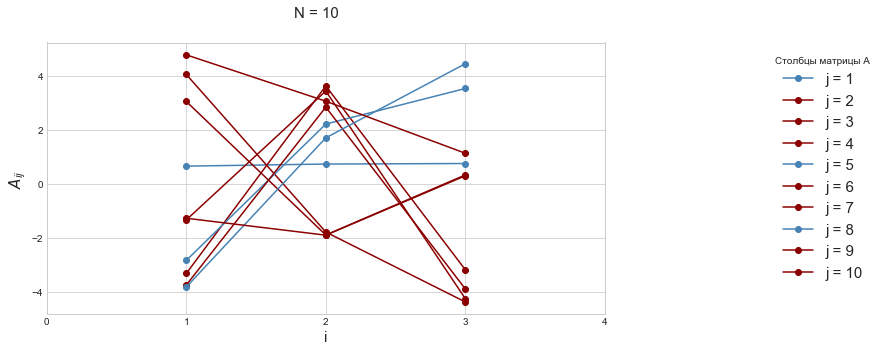

In [42]:
pylab.figure(figsize=(10,5))
col = ['steelblue', 'darkred']
s = numpy.sum(A == numpy.sort(A, axis=0), axis=0) < len(A)
for j in range(len(A[0])):
    pylab.plot(range(len(A)), [A[i][j] for i in range(len(A))], 
               '-o', c=col[int(s[j])], 
               label='j = ' + str(j+1))

pylab.suptitle('N = ' + str(N), fontsize=15)
pylab.xlabel('i', fontsize=15) 
pylab.ylabel(r'$A_{ij}$', fontsize=15)
pylab.xticks(range(-1, len(A)+1), range(len(A)+2));
pylab.legend(title='Столбцы матрицы A', 
             fontsize=15, shadow=True, 
             bbox_to_anchor=(1.5,1.0));

### 4. Таблица данных 

| Класс | Имя | Описание (смысл, диапазон, точность) | Тип | Структура | Формат в/в |
| :-: | :-: | :-: | :-: | :-: | :-: |
| входные данные | fin | название текстового файла с элементами матрицы А | символ | строка | "+XX.txt" |
| входные данные | fout | название текстового файла с элементами матрицы А | символ | строка | "+XX.txt" |
| входные данные | A | вводимые из текстового файла числа исходной матрицы | вещ | двумерный массив | +XX (:5:6) |
| выходные данные | N | выводимый в текстовый файл наибольший номер неупорядоченного столбца | цел | простая переменная | +XX (:5) |
| промежуточные данные | i | индекс текущего элемента, 1≤i≤50 | цел | простая переменная | --- |
| промежуточные данные | j | индекс текущего элемента, 1≤j≤50 | цел | простая переменная | --- |
| промежуточные данные | m | массив максимальных значений для каждого столбца | вещ | одномерный массив | --- |

_! в Delphi выход из цикла с 1 до 20 с шагом +1 происходит при значении 21, из цикла с 20 до 1 – при 0_

### 5. Входная форма
- обр 1.1 Текстовый файл с элементами матрицы A: $<fin>$       
- обр 1.2 Текстовый файл с элементами матрицы A и номером столбца N: $<fout>$
- обр 2.1 Исходная матрица A:
- обр 2.2 $ < A[11] >  < A[12] >  …  < A[1m] > \\ ... \\ < A[n1] >  < A[n2] >  …  < A[nm] >$


### 6. Выходная форма

- обр 3 Лаб. 9
- обр 4.1 Текстовый файл с элементами матрицы A: $<fin>$       
- обр 4.2 Текстовый файл с элементами матрицы A и номером столбца N:: $<fout>$
- обр 5.1 Исходная матрица A:
- обр 5.2 $ < A[11] >  < A[12] >  …  < A[1m] > \\ ... \\ < A[n1] >  < A[n2] >  …  < A[nm] >$
- обр 6.1 Наибольший номер неупорядоченного столбца N (по неубыванию): $ < N > $
- обр 6.2 Все столбцы матрицы сортированы по неубыванию

### 7. Аномалии

-

### 8. Функциональные тесты

| Исходные данные | - | - |Результаты | - | Тест |
| :-: | :-: | :-: | :-: | :-: | :-: |
| fin | fout | A | N | Сообщение |№ |
| A_Lab9_1.txt | AN_Lab9_1.txt | `[[ 84  73 -20 -62 -47] [ 13  40 -96  16 -47] [ 51 -31  66 -43  39] [-94  70 -12 -13 -15]]` | `5` | - | 1 | 
| - | - | - | - | - | - |
| A_Lab9_2.txt | AN_Lab9_2.txt | `[[1 1 0 1 1] [0 0 0 0 0] [1 0 1 0 0]]` | `5` | - | 2 |
| - | - | - | - | - | - |
| A_Lab9_3.txt | AN_Lab9_3.txt | `[[0 0] [0 2] [2 4]]` | `0` | Все столбцы матрицы сортированы по неубыванию | 3 |
| - | - | - | - | - | - |
| A_Lab9_4.txt | AN_Lab9_4.txt | `[[-4 -9 -3 -9 -6 -8 -6] [-4 -1 -1 -6 -1 -8 -7] [-8 -8 -8 -1 -8 -2 -6]]` | `7` | - | 4 |
| - | - | - | - | - | - |
| A_Lab9_5.txt | AN_Lab9_5.txt | `[[ 4.65686407  4.04533509 -3.30944422  3.04703298 -2.82836498 -1.33122366 -3.73740085 -3.81033447 -1.26949406  4.76996665] [ 1.7333839  -1.78020585  3.62076868 -1.8891421   2.21228912  3.43417954 2.83782822  1.70289398 -1.8955828   3.05625326] [ 2.75286188 -4.36364877 -3.17314753  0.3313719   3.52666878 -4.240443 -3.88176302  4.44243148  0.30038683  1.13223991]]` | `10` | - | 5 |

| № теста | Входные  данные | - | - | Ожидаемый результат | - | Смысл теста |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| - | - | - | - | - | - | - |
| 1 | fin = 'A_Lab9_1.txt' | fout = 'AN_Lab9_1.txt' |  A = `[[ 84  73 -20 -62 -47] [ 13  40 -96  16 -47] [ 51 -31  66 -43  39] [-94  70 -12 -13 -15]]` | N = `5` | - | Подтвердить правильность расчетов в случае широкого спектра положительных и отрицательных чисел |
| - | - | - | - | - | - | - |
| 2 | fin = 'A_Lab9_2.txt' | fout = 'AN_Lab9_2.txt' |  A = `[[1 1 0 1 1] [0 0 0 0 0] [1 0 1 0 0]]` | N = `5` | - | Протестировать простейший бинарный случай |
| - | - | - | - | - | - | - |
| 3 | fin = 'A_Lab9_3.txt' | fout = 'AN_Lab9_3.txt' |  A = `[[0 0] [0 2] [2 4]]` | N = `0` | Все столбцы матрицы сортированы по неубыванию | Протестировать массив в узком диапазоне неотрицательных чисел |
| - | - | - | - | - | - | - |
| 4 | fin = 'A_Lab9_4.txt' | fout = 'AN_Lab9_4.txt' |  A = `[[-4 -9 -3 -9 -6 -8 -6] [-4 -1 -1 -6 -1 -8 -7] [-8 -8 -8 -1 -8 -2 -6]]` | N = `7` | - | Протестировать массив в узком диапазоне положительных и отрицательных чисел |
| - | - | - | - | - | - | - |
| 5 | fin = 'A_Lab9_5.txt' | fout = 'AN_Lab9_5.txt' |  A = `[[ 4.65686407  4.04533509 -3.30944422  3.04703298 -2.82836498 -1.33122366 -3.73740085 -3.81033447 -1.26949406  4.76996665] [ 1.7333839  -1.78020585  3.62076868 -1.8891421   2.21228912  3.43417954 2.83782822  1.70289398 -1.8955828   3.05625326] [ 2.75286188 -4.36364877 -3.17314753  0.3313719   3.52666878 -4.240443 -3.88176302  4.44243148  0.30038683  1.13223991]]` | N = `10` | - | Подтвердить правильность расчетов в случае действительных чисел |

| - | Результаты | № теста |
| :-: | :-: | :-: |
| - | - | - |
| N | Максимальная вычислительная нагрузка = 15 сравнений | 1 |
| - | Соответствует ожидаемым числовым значениям | - |
| N | Максимальная вычислительная нагрузка = 10 сравнений | 2 |
| - | Соответствует ожидаемым числовым значениям, легко подтверждается визуально | - |
| N | Максимальная вычислительная нагрузка = 3 сравнения  | 3 |
| - | Нет неупорядоченных столбцов | - |
| N | Максимальная вычислительная нагрузка = 14 сравнений | 4 |
| - | Соответствует ожидаемым числовым значениям | - |
| N | Максимальная вычислительная нагрузка = 20 сравнений | 5 |
| - | Соответствует ожидаемым числовым значениям | - |
| - | - | - |
| Сообщение | - | 1 |
| Сообщение | - | 2 |
| Сообщение | Все столбцы матрицы сортированы по неубыванию | 3 |
| Сообщение | - | 4 |
| Сообщение | - | 5 |

### 9. Метод
Отделим ввод-вывод от обработки данных и разделим задачу на три подзадачи:

1. _Подзадача А 0.1._ 

   Запросить названия текстовых файлов ввода-вывода, 
   
   считать из текстового файла ввода исходные данные (обр.1-2), 
   
   затем вывести их на экран (обр.3-5) для визуального подтверждения.

2. _Подзадача А 0.2._ 

   Решение поставленной задачи: 

   на основе введенных исходных данных (матрицы `A`) определить 
   
   номер последнего неупорядоченного по неубыванию столбца.
    
3. _Подзадача А 0.3._ 

   Ввести полученные результаты (`N`) на экран (обр.6.1, 6.2) и 
   
   записать в файл вывода исходный массив и полученный результат.
   
---

Ввод-вывод тривиален и представляет собой чисто техническую задачу. 

Для осуществления процесса ввода-вывода и обработки массива потребуются промежуточные переменные: 

- `i` – индекс текущей строки матрицы, 

- `j` – индекс текущего столбца матрицы,

- `m` - массив максимальный значений для каждого столбца.

Их следует добавить в таблицу данных. 

Алгоритм необходим только для обработка входных данных и расчета результата. 

### 10. Алгоритм

[Sample diagrams](http://blockdiag.com/en/blockdiag/examples.html#sample-diagrams)

In [16]:
%%file block_diagram

blockdiag {
    orientation = portrait;
    class start_end [shape = ellipse, fontsize = 15, color = lightskyblue];
    class input_out [shape = flowchart.input, fontsize = 15, width = 700, color = lightcyan];
    class main_box [shape = box, width = 600, height = 150, fontsize = 18];
    
    Начало -> 
    "Вывод заголовка по обр.3 на экран" -> 
    "Ввод имени файла по обр.1.1" -> "Ввод имени файла по обр.1.2" ->
    "Вывод пояснения по обр.2.1" -> "Ввод А из файла по обр.2.2" ->
    "Вывод имени файла по обр.4.1 на экран" -> "Вывод имени файла по обр.4.2 на экран" ->
    "Вывод пояснения по обр.5.1 на экран" -> "Вывод А на экран и в файл по обр.5.2" ->
    "Определение наибольшего номера\n неупорядоченного по неубыванию\n столбца N" ->
    "Вывод N или сообщения на экран и в файл по обр.6.1,6.2" ->
    Конец;

    Начало, Конец [class = "start_end"];
    "Ввод имени файла по обр.1.1", "Ввод имени файла по обр.1.2" [class = "input_out"];
    "Вывод пояснения по обр.2.1", "Ввод А из файла по обр.2.2" [class = "input_out"];
    "Вывод имени файла по обр.4.1 на экран", "Вывод имени файла по обр.4.2 на экран" [class = "input_out"];
    "Вывод пояснения по обр.5.1 на экран", "Вывод А на экран и в файл по обр.5.2" [class = "input_out"]; 
    "Вывод заголовка по обр.3 на экран", "Вывод N или сообщения на экран и в файл по обр.6.1,6.2" [class = "input_out"];
    "Определение наибольшего номера\n неупорядоченного по неубыванию\n столбца N" [class = "main_box"];
    
    "Вывод А на экран и в файл по обр.5.2" -> 
    "Определение наибольшего номера\n неупорядоченного по неубыванию\n столбца N" [label = 'Вх. А', fontsize = 18];
    "Определение наибольшего номера\n неупорядоченного по неубыванию\n столбца N" ->
    "Вывод N или сообщения на экран и в файл по обр.6.1,6.2" [label = 'Вых. N', fontsize = 18];
}

Overwriting block_diagram


In [17]:
!blockdiag block_diagram

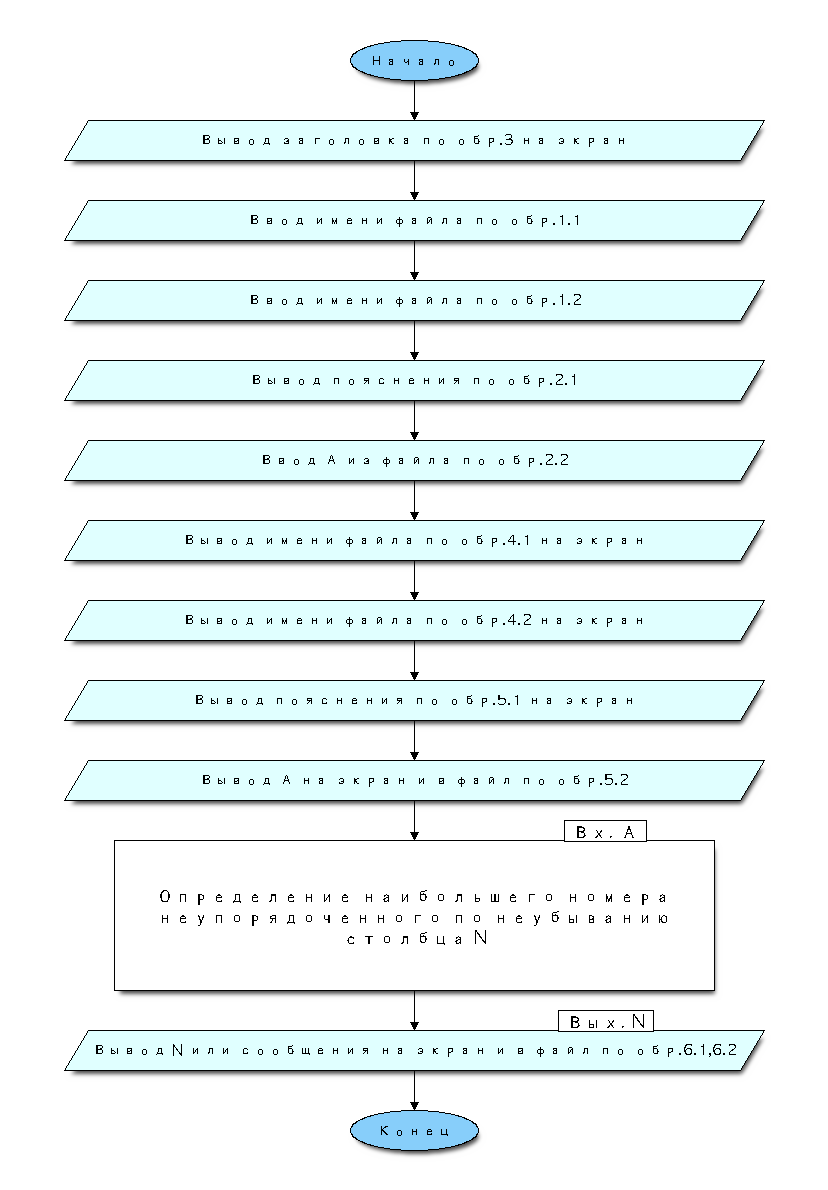

In [18]:
Image("block_diagram.png")

### 11. Программа на <i>Delphi</i>. 

__Диалоговый вариант {ввод названий файлов и данных из текстового файла, вывод на экран и в текстовый файл}__

Синтаксис:

[Pascal Tutorial](https://www.tutorialspoint.com/pascal/index.htm)

In [ ]:
program Lab9; //сохранить как lab9.dpr (DPR – Delphi PRoject)  
{$APPTYPE CONSOLE}
Uses Windows; // 

    var
        i, j, N: integer;
        fin, fout: string;
        tfin, tfout: TextFile;
        A: array [0..1000, 0..1000] of real;

    begin
        setConsoleCP(1251); // 
        setConsoleOutputCP(1251); // 

        {A0.1, A0.3 - ввод-вывод входных данных}
        writeln('Лаб.9' :40); {вывод заголовка c переходом на следующую строку по обр.3}
        
        {ввод-вывод строковой переменной - имени файла с входными данными по обр.1.1, 4.1}
        writeln('Текстовый файл с элементами матрицы A: '); 
        readln(fin);
        writeln(fin);

        {ввод-вывод строковой переменной - имени файла с выходными данными по обр.1.2, 4.2}
        writeln('Текстовый файл с элементами матрицы A и номером столбца N: '); 
        readln(fout); 
        writeln(fout);
        
        {ввод-вывод исходного массивa A по обр.2.1, 2.2, 5.1, 5.2}
        writeln('Исходная матрица A: '); {вывод пояснения с переходом на следующую строку}
        
        AssignFile(tfin, fin); reset(tfin); {открыть файл для чтения} 
        AssignFile(tfout, fout); rewrite(tfout); {открыть файл для записи}
            
        i :=1;
        while not eoln do
        begin
            j := 1;
            while not eoln do
            begin
                read(A[i,j]);
                write(A[i,j], ' '); {вывод элемента на экран}
                write(tfout, A[i,j]:5:6, ' '); {вывод элемента в файл}
                j := j + 1;
            end;
            readln; writeln;
            writeln(tfout);
            i := i + 1;
        end;
            
        CloseFile(tfin); {закрыть файл для чтения} 
   
        for i:=1 to 80 do 
            write('='); {отделим визуально чертой и строкой введенные и выводимые значения}
        writeln;
        
        N := 5; {заглушка для теста 1, 2}             
        // N := 0; writeln('Все столбцы матрицы сортированы по неубыванию'); {заглушка для теста 3}
        // N := 7; {заглушка для теста 4}
        // N := 10; {заглушка для теста 5}    
                    
        writeln('Наибольший номер неупорядоченного столбца по неубыванию N:', N:2);
        {вывод переменной и переход на следующую строку на экране по обр.6.1,6.2}             
        writeln(tfout, N:2); 
        {вывод переменной и переход на следующую строку в файле по обр.6.1,6.2}
        
        CloseFile(tfout); {закрыть файл для записи}
        
    end.

## Раскрытие абстракции А0.2
_Поскольку условие всей задачи совпадает (за исключением необходимости ввода-вывода) с условием выделенной подзадачи,_

_вместо полной спецификации с пунктами 1-11 выполнено просто дополнение к пунктам 9-11._

### 9. Метод
Пусть

- $i$ – номер текущей строки,

- $j$ – номер текущего столбца,

- $A[i][j]$ – соответствующий элемент исходной матрицы A,

- $N$ - наибольший номер неупорядоченного по неубыванию столбца.
  
В циклах по каждой $i$-ой строке по каждому $j$-му столбцу выполняются следующие действия:

- проверяется выполнение условия: $\exists i: 0<i<n+1 \land A_{ij} > A_{i+1j}$;

- если выражение верно хотя бы для одного $i$, то 

  - столбец $j$ не упорядочен по неубыванию и 
  
  - значение номера $N$ необходимо обновить. 

### 10. Алгоритм

In [29]:
%%file block_diagram2

blockdiag {
    orientation = portrait;
    
    class yes [thick, label = "Да", color = blue, textcolor = blue];
    class no [thick, label = "Нет", color = red, textcolor = red];
    class start_end [shape = ellipse, fontsize = 18, color = lightskyblue];
    class input_out [shape = flowchart.input, fontsize = 18, 
                     width = 400, color = lightcyan];
    class loop_in [shape = flowchart.loopin, fontsize = 18, 
                   width = 200, color = lightsteelblue];
    class loop_out [shape = flowchart.loopout, fontsize = 18, 
                    width = 200, color = lightsteelblue];
    class condition [shape = flowchart.condition, fontsize = 18, 
                     width = 250, height = 100, color = lightsteelblue];
    class command_box [shape = roundedbox, fontsize = 18, width = 300];
    
    Начало -> "N := 0" -> "i := 1; +1; n" -> 
    "j := 1; +1; n" -> "i = 1" -> "m[j] := A[1,j]" -> "j = n";
    "i = 1" -> "A[i,j] >= m[j]" -> "m[j] := A[i,j]" -> 
    "j = n" -> "i = n" -> Конец; 
    "A[i,j] >= m[j]" -> "N := j" -> "j = n";
    
    Начало, Конец [class = "start_end"];
    "i := 1; +1; n", "j := 1; +1; n" [class = "loop_in"];
    "i = n", "j = n" [class = "loop_out"];
    "i = 1", "A[i,j] >= m[j]" [class = "condition"];
    "m[j] := A[1,j]", "m[j] := A[i,j]" [class = "command_box"];
    "N := 0", "N := j" [class = "command_box"];
    
    "i = 1" -> "m[j] := A[1,j]"  [class = 'yes'];
    "i = 1" -> "A[i,j] >= m[j]" [class = 'no'];
    "A[i,j] >= m[j]" -> "m[j] := A[i,j]"  [class = 'yes'];
    "A[i,j] >= m[j]" -> "N := j" [class = 'no'];
}

Overwriting block_diagram2


In [30]:
!blockdiag block_diagram2

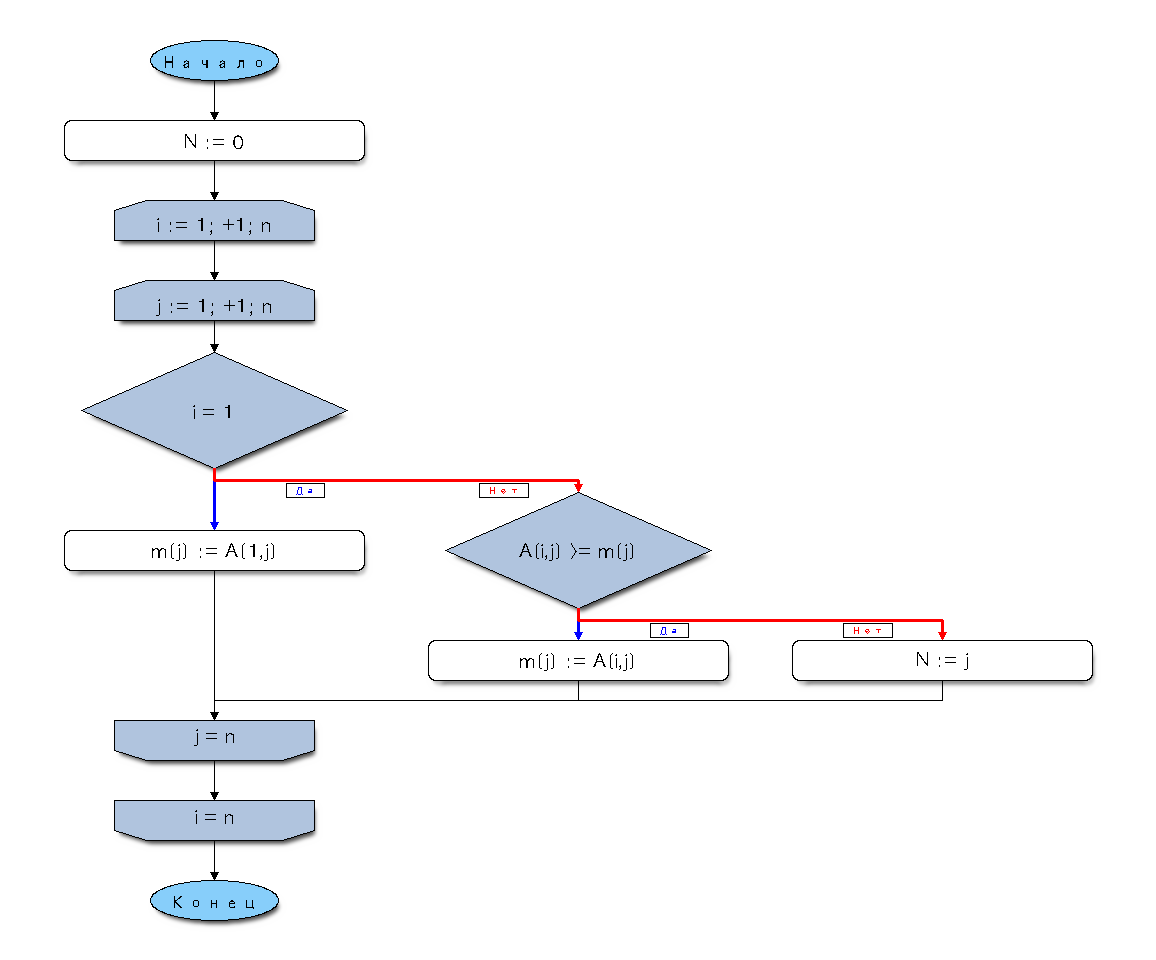

In [31]:
Image("block_diagram2.png")

### 11. Программа на <i>Delphi</i>.
#### Программный код раскрытия абстракции.

In [ ]:
i := 1; N := 0;
            
while not eoln do
begin
    j := 1; 
    while not eoln do
    begin
        read(A[i,j]);
        write(A[i,j]:5:6, ' ');
            
        if i = 1 then 
        begin
            m[j] := A[1,j];
            c[j] := 0;
        end
        else 
            if A[i,j] >= m[j] then
                m[j] := A[i,j]
            else c[j] := c[j] + 1; 
                
        if c[j] > 0 then N := j;
        j := j + 1;
        end;
        
    readln; writeln;
    i := i + 1;
end;

#### Вариант программы для чтения и записи текстовых файлов.

#### Вариант программы с именами файлов, заданными в качестве параметров.

#### Вариант программы для онлайн-компилятора.
[Compile and Execute Pascal Online](http://www.compileonline.com/compile_pascal_online.php)

In [ ]:
// main.pas
Program Lab9;

var
    i, j: integer;
    N: integer;
    A: array [0..1000, 0..1000] of real;    
    m: array [0..1000] of real; 
    c: array [0..1000] of integer;
        
begin

    {A0.1, A0.3 - ввод-вывод входных данных}
    writeln('Лаб.9' :40); {вывод заголовка c переходом на следующую строку по обр.3}
    
    writeln;
    {ввод-вывод исходной матрицы A по обр.2.1, 2.2, 5.1, 5.2}    
    writeln('Исходная матрица A: '); 
    {вывод пояснения с переходом на следующую строку}
            
    i := 1; N := 0;
            
    while not eoln do
    begin
        j := 1; 
        while not eoln do
        begin
            read(A[i,j]);
            write(A[i,j]:5:6, ' ');
            
            if i = 1 then 
            begin
                m[j] := A[1,j];
                c[j] := 0;
            end
            else 
                if A[i,j] >= m[j] then
                    m[j] := A[i,j]
                else c[j] := c[j] + 1; 
                
            if c[j] > 0 then N := j;
            j := j + 1;
        end;
        
        readln; writeln;
        i := i + 1;
    end;

    writeln;
    writeln('Наибольший номер неупорядоченного столбца по неубыванию N: '); {вывод пояснения с переходом на следующую строку}
    writeln(N:2); {вывод значения переменной и переход на следующую строку на экране}
    
end.

In [ ]:
// STDIN
-4 -9 -3 -9 -6 -8 -6
-4 -1 -1 -6 -1 -8 -7
-8 -8 -8 -1 -8 -2 -6
